The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [75]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [76]:
# Read the dataset from the csv file
df = pd.read_csv('data/nobel.csv')

# See the head of the dataset
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [77]:
# Seeing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [78]:
# Seeing the describtion 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000.0,1973.721,34.523195,1901.0,1949.75,1979.0,2003.00,2023.0
laureate_id,1000.0,509.099,298.130617,1.0,250.75,500.5,764.25,1034.0


In [79]:
# Seeing the shape 
df.shape

(1000, 18)

In [80]:
# Seeing the columns
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [81]:
# Checking for the null data
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [82]:
# Checking for duplicated data
df.duplicated().sum()

# As we can see, we do not have any duplicated data

0

## Filling the missing values

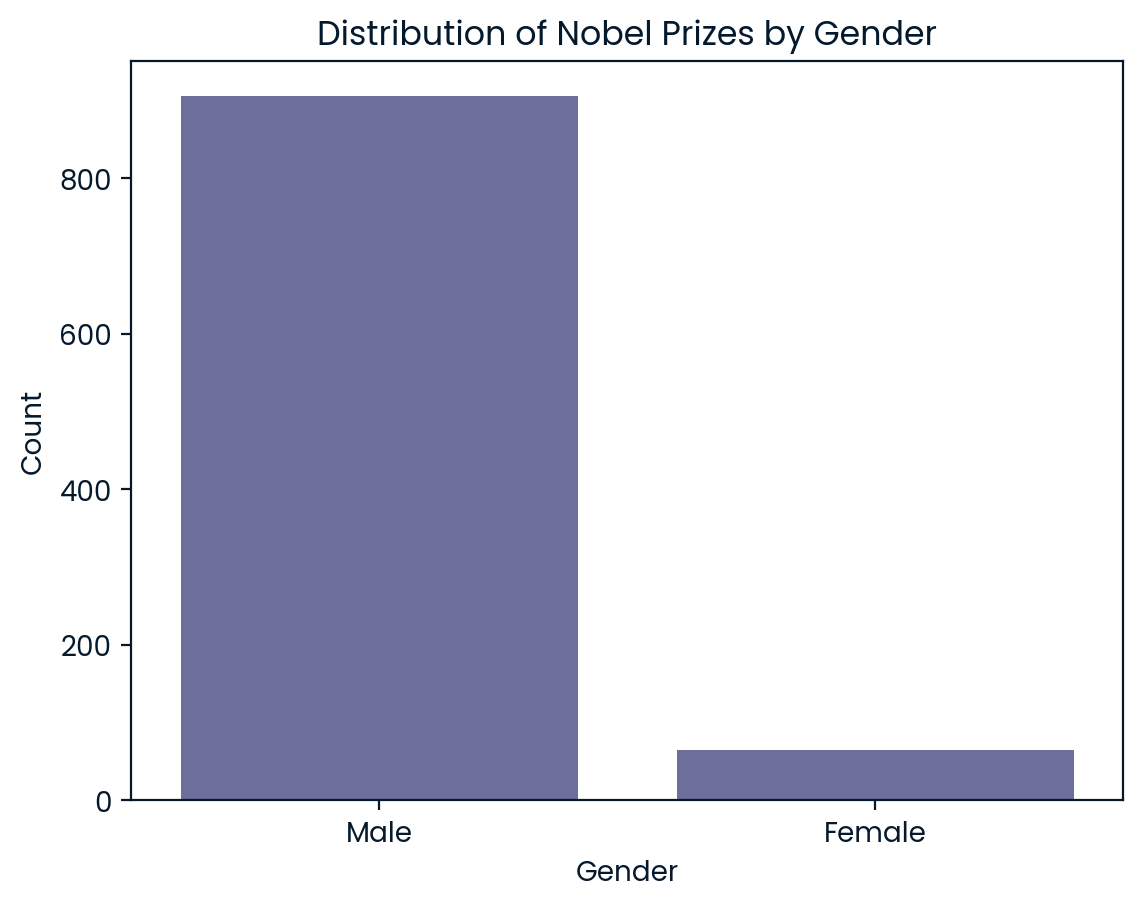

In [83]:
sns.countplot(data=df, x='sex', order=df['sex'].value_counts().index)
plt.title('Distribution of Nobel Prizes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [84]:
# Let's see the most common gender in the data
df['sex'].mode()[0]
# As we can see, it is Male, so let's fill the null values in sex with Male

'Male'

In [85]:
common_sex_value = df['sex'].mode()[0]
common_sex_value

'Male'

In [86]:
# Let's now fill the null data in sex with the most common value
df['sex'] = df['sex'].fillna(common_sex_value)

# Now, let's check the null values again after filling
df['sex'].isna().sum()

0

In [87]:
df['birth_country'].value_counts()

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

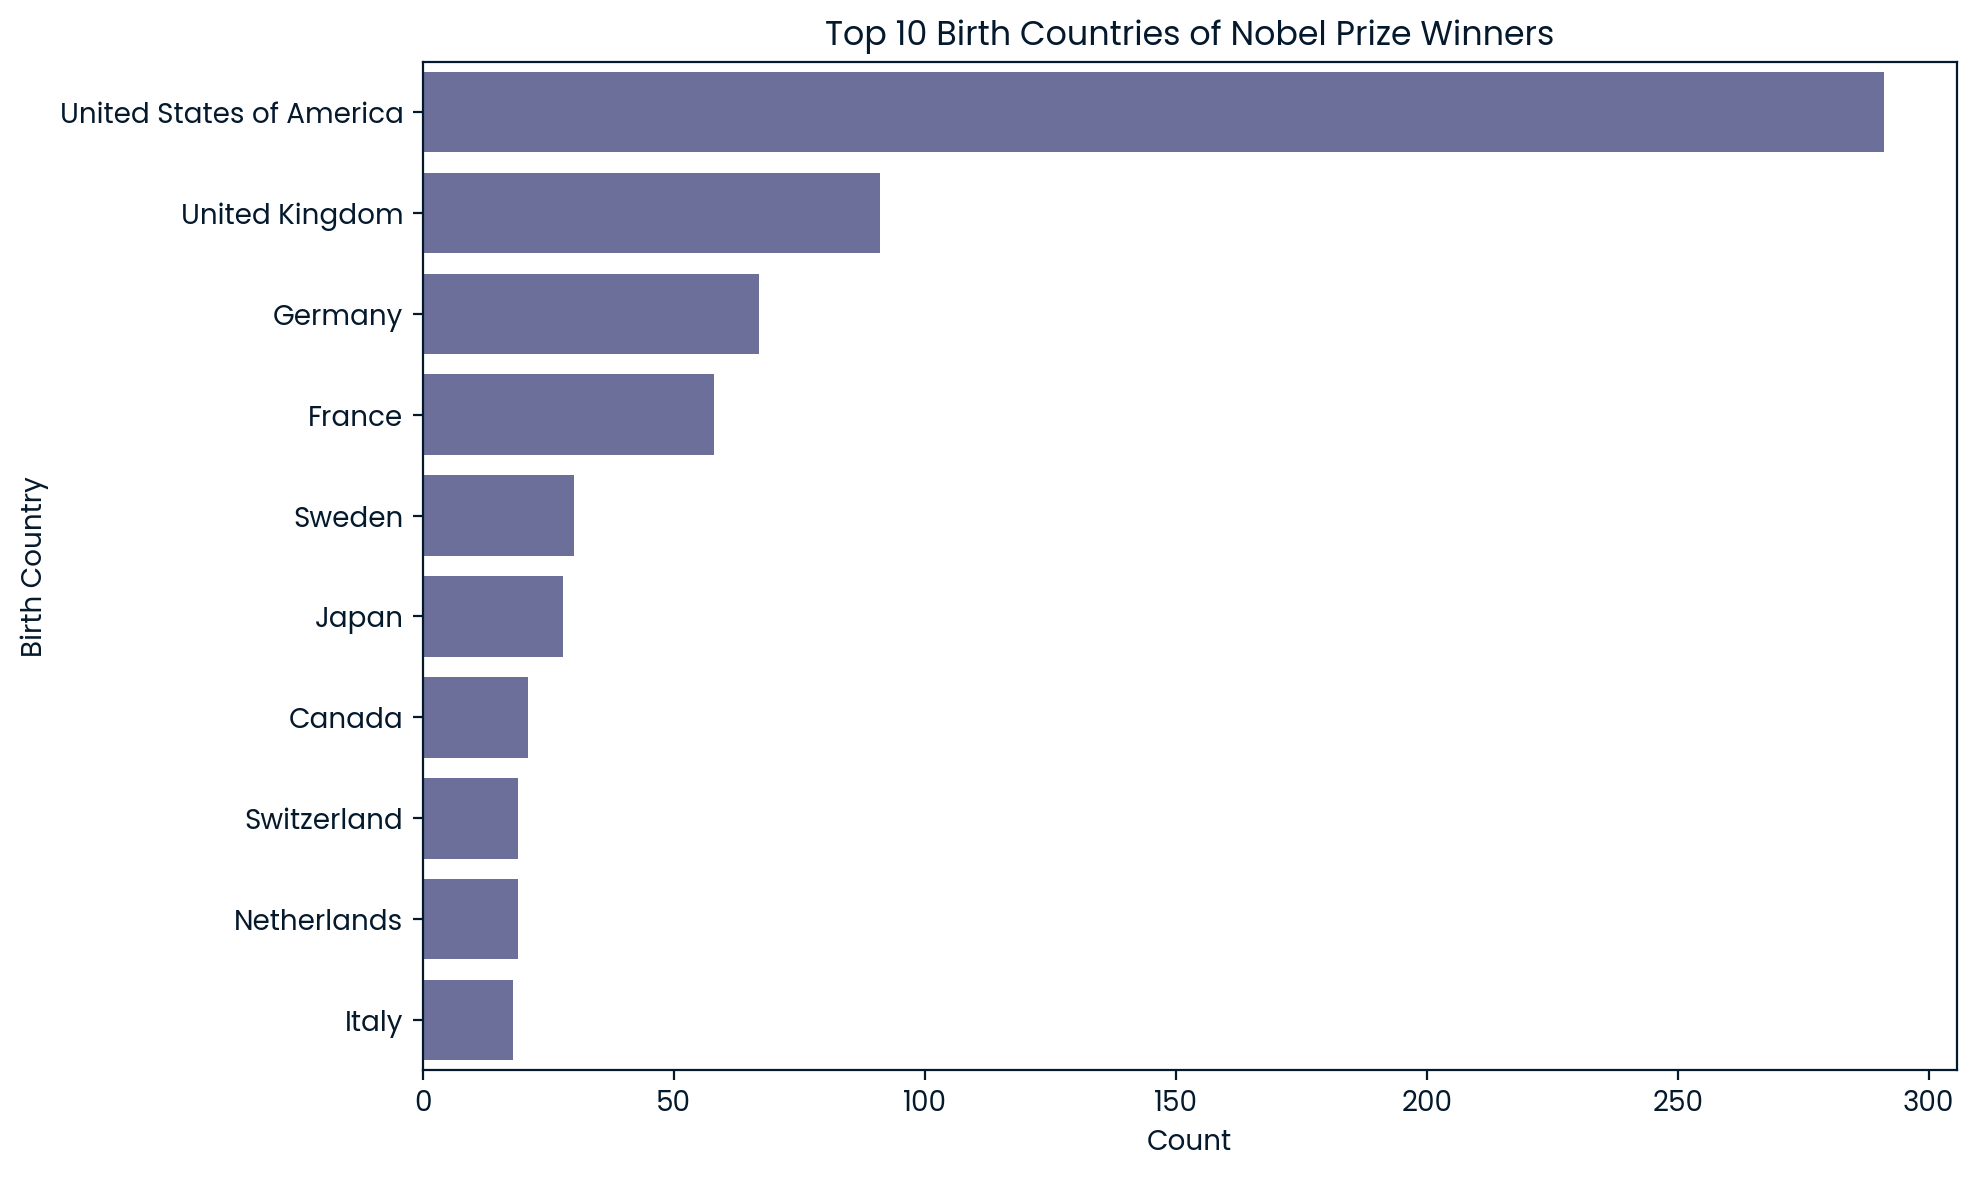

In [88]:
top_10_countries = df['birth_country'].value_counts().nlargest(10).index
filtered_df = df[df['birth_country'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, y='birth_country', order=top_10_countries)
plt.title('Top 10 Birth Countries of Nobel Prize Winners')
plt.xlabel('Count')
plt.ylabel('Birth Country')
plt.tight_layout()
plt.show()

In [89]:
# Getting the most common birth country
common_birth_country = df['birth_country'].mode()[0]
common_birth_country

'United States of America'

In [90]:
# Now, let's fill the null data with the common birth country
df['birth_country'] = df['birth_country'].fillna(common_birth_country)

# Now, let's check the null values after filling 
df['birth_country'].isna().sum()

0

### What is the most commonly awarded gender and birth country?

#### the most commonly awarded gender

In [91]:
# Let's see the value counts of sex
gender_counts = df['sex'].value_counts()
gender_counts 

Male      935
Female     65
Name: sex, dtype: int64

In [92]:
# Now, let's get the Top Gender by using idxmax
top_gender = gender_counts.idxmax()
top_gender

'Male'

#### What is the most commonly awarded birth country?

In [93]:
# Let's see the value counts of sex
birth_country_counts = df['birth_country'].value_counts()
birth_country_counts

United States of America                        322
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

In [94]:
top_country = birth_country_counts.idxmax()
top_country

'United States of America'

In [95]:
print(f'What is the most commonly awarded gender?')
print(f'The most commonly awarded gender is {top_gender} ')
print('--------------------------------------------------\n')

print(f'What is the most commonly awarded birth country?')
print(f'The most commonly awarded birth country is {top_country} ')
print('--------------------------------------------------')

What is the most commonly awarded gender?
The most commonly awarded gender is Male 
--------------------------------------------------

What is the most commonly awarded birth country?
The most commonly awarded birth country is United States of America 
--------------------------------------------------


<hr />

## Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [96]:
# Let's start with creating the decade
df['decade'] = (df['year'] // 10) * 10
df['decade']

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int64

In [97]:
# Let's get the total decade by grouping it 
decade_total = df.groupby('decade').size()
decade_total

decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010    121
2020     50
dtype: int64

In [98]:
# Let's filter only the ones who born in us
us_born = df[df['birth_country'] == 'United States of America']
us_born

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,United States of America,Male,NaN,NaN,NaN,NaN,NaN,NaN,1900
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America,1900
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,United States of America,Male,NaN,NaN,NaN,NaN,NaN,NaN,1910
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America,1910
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2022,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1022,Individual,Douglas Diamond,1953-10-25,"Chicago, IL",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,NaN,NaN,NaN,2020
988,2022,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1023,Individual,Philip Dybvig,1955-05-22,"Gainesville, FL",United States of America,Male,Washington University,"St. Louis, MO",United States of America,NaN,NaN,NaN,2020
990,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1025,Individual,Drew Weissman,1959-09-07,"Lexington, MA",United States of America,Male,Penn Institute for RNA Innovations University ...,"Philadelphia, PA",United States of America,NaN,NaN,NaN,2020
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,2020


In [99]:
decade_us = us_born.groupby('decade').size()
decade_us

decade
1900     2
1910     5
1920     4
1930    15
1940    16
1950    22
1960    25
1970    34
1980    34
1990    45
2000    56
2010    42
2020    22
dtype: int64

In [100]:
decade_ratios = (decade_us / decade_total).fillna(0)
max_decade_usa = int(decade_ratios.idxmax())
max_decade_usa

2000

In [101]:
print('Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?')
print(f'The highest ratio of US-born Nobel Prize winners to total winners in all categories is {max_decade_usa}')

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
The highest ratio of US-born Nobel Prize winners to total winners in all categories is 2000


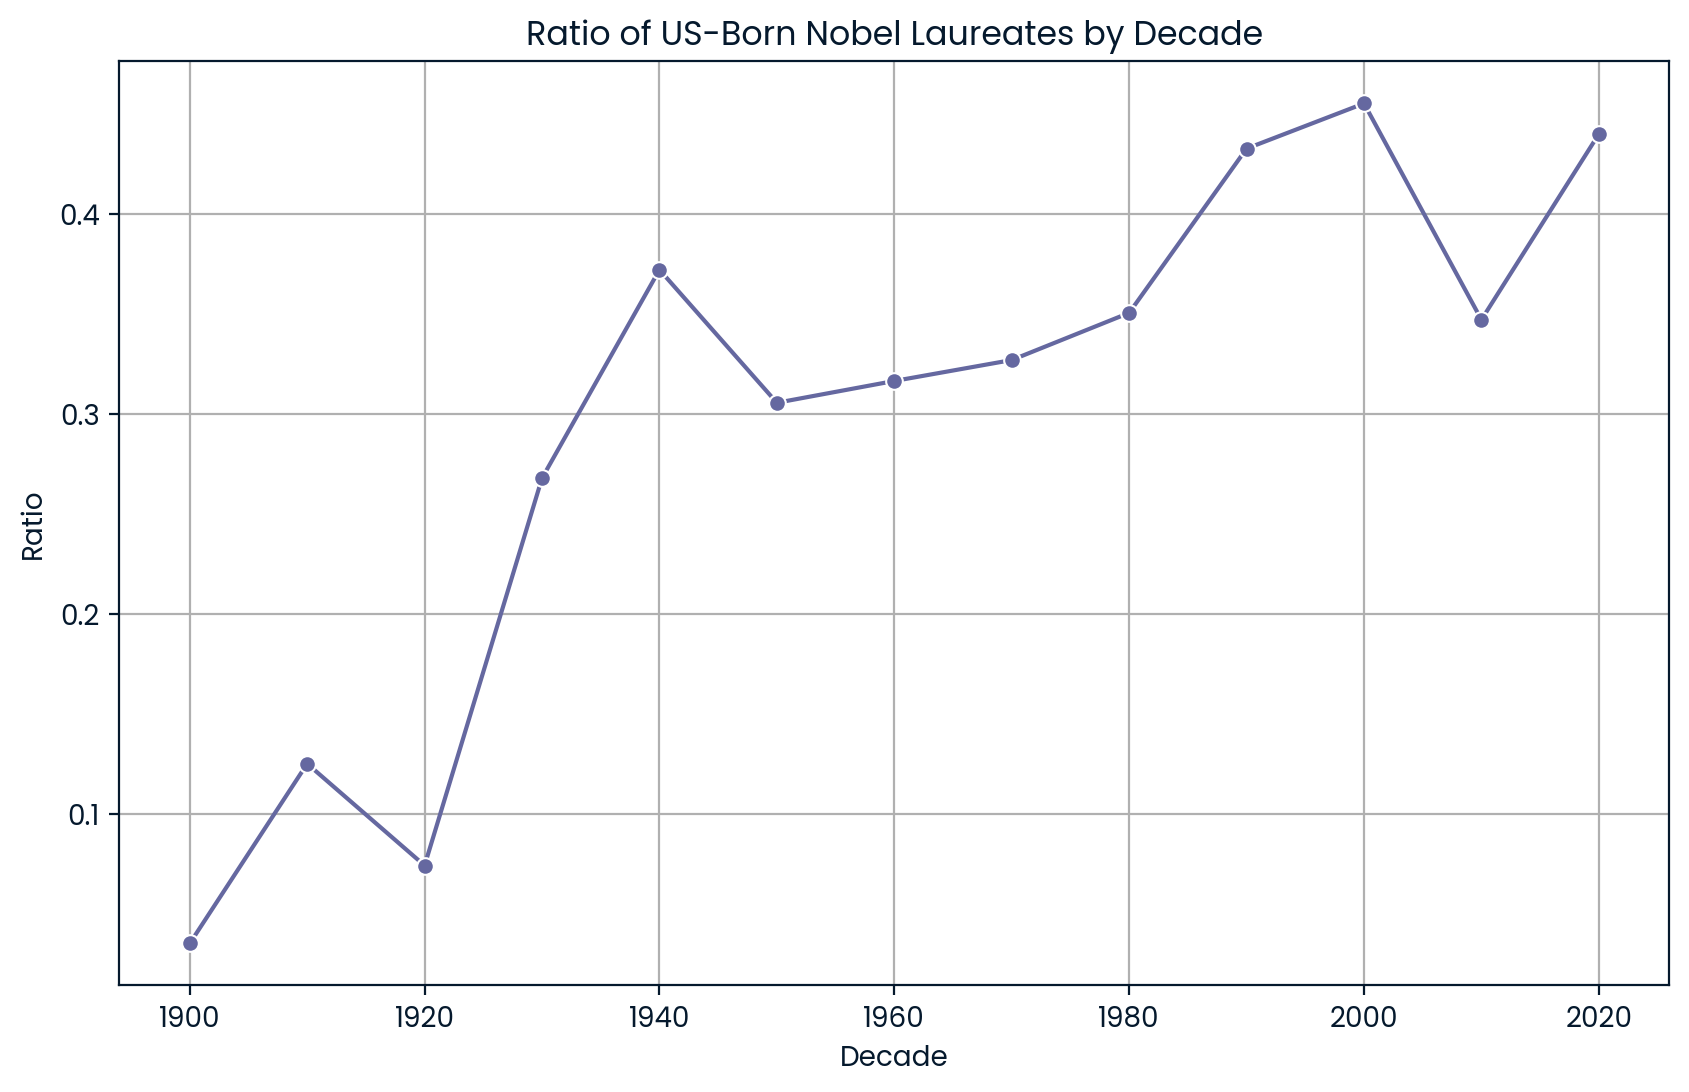

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=decade_ratios.index, y=decade_ratios.values, marker='o')
plt.title('Ratio of US-Born Nobel Laureates by Decade')
plt.xlabel('Decade')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()


### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [103]:
# as we need to see the decade and category, we need to group the data based on it
cat_combination = df.groupby(['decade', 'category'])
cat_combination 

In [104]:
cat_combination['sex'].value_counts()

decade  category    sex   
1900    Chemistry   Male       9
        Literature  Male       9
                    Female     1
        Medicine    Male      11
        Peace       Male      13
                              ..
2020    Medicine    Female     1
        Peace       Male       5
                    Female     2
        Physics     Male      10
                    Female     2
Name: sex, Length: 110, dtype: int64

In [105]:
# cat_combination[cat_combination['sex'] == 'Female'].sum()
female_ratios = cat_combination['sex'].apply(lambda x: (x == 'Female').sum() / x.count())
female_ratios

decade  category  
1900    Chemistry     0.000000
        Literature    0.100000
        Medicine      0.000000
        Peace         0.071429
        Physics       0.076923
                        ...   
2020    Economics     0.111111
        Literature    0.500000
        Medicine      0.125000
        Peace         0.285714
        Physics       0.166667
Name: sex, Length: 72, dtype: float64

In [106]:
max_index = female_ratios.idxmax()
max_index

(2020, 'Literature')

In [107]:
max_female_dict = {int(max_index[0]): max_index[1]}
max_female_dict

{2020: 'Literature'}

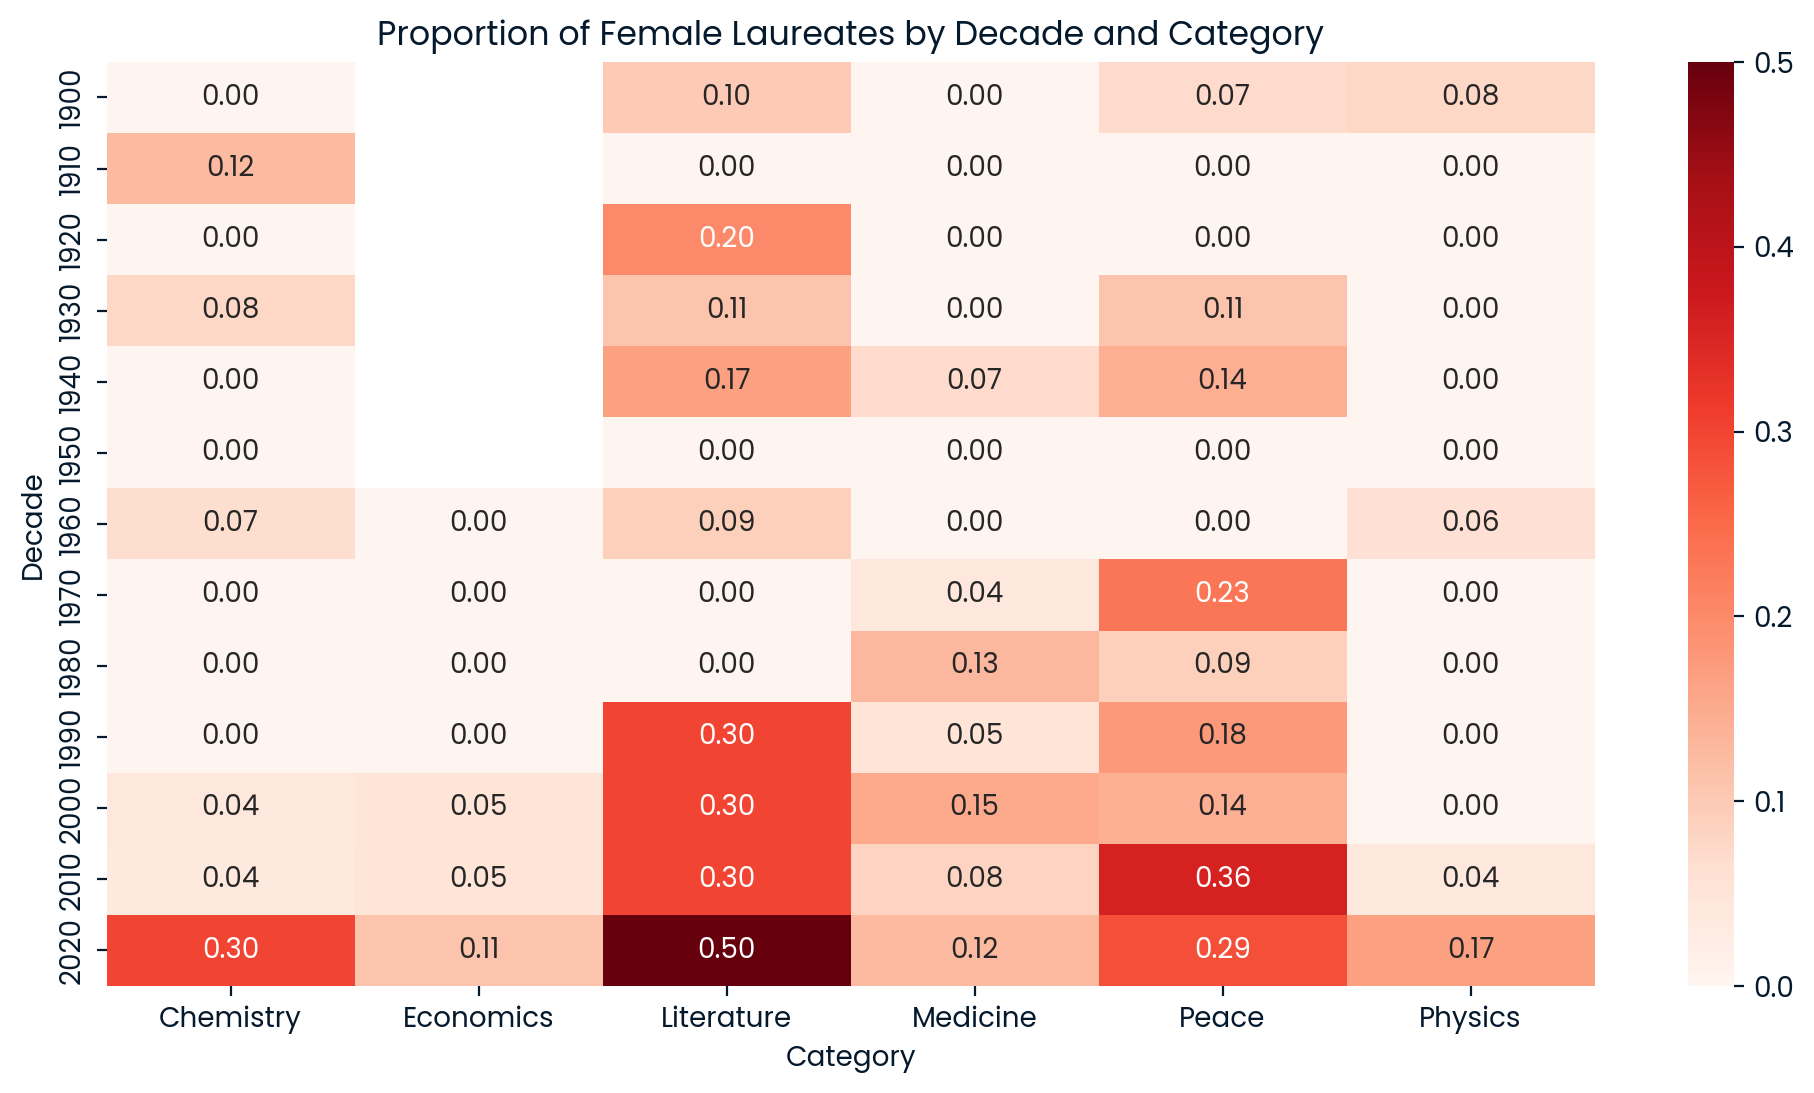

In [108]:
heatmap_data = female_ratios.unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds")
plt.title('Proportion of Female Laureates by Decade and Category')
plt.xlabel('Category')
plt.ylabel('Decade')
plt.show()


### Who was the first woman to receive a Nobel Prize, and in what category?

In [109]:
# First, we need to filter the data with only Female, then sort it based on the year
first_woman = df[df['sex'] == 'Female'].sort_values('year').iloc[0]
first_woman

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

In [110]:
first_woman_name = first_woman['full_name']
first_woman_name

'Marie Curie, née Sklodowska'

In [111]:
first_woman_category = first_woman['category']
first_woman_category

'Physics'

In [112]:
print('Who was the first woman to receive a Nobel Prize, and in what category?')
print('---------------------------------')
print(f'The first woman received a Nobel Prize is {first_woman_name} in the category {first_woman_category}')



Who was the first woman to receive a Nobel Prize, and in what category?
---------------------------------
The first woman received a Nobel Prize is Marie Curie, née Sklodowska in the category Physics


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [113]:
# Let's see the name of the people who won a lot
repeated_woners = df['full_name'].value_counts()
repeated_woners

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: full_name, Length: 993, dtype: int64

In [114]:
# Let's filter the ones who won more than 1
more_one_woners = repeated_woners[repeated_woners > 1]
more_one_woners

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: full_name, dtype: int64

In [115]:
# Now, let's take the names only and make it a list
repeat_list = more_one_woners.index.tolist()
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [116]:
print('Which individuals or organizations have won more than one Nobel Prize throughout the years?')
print('---------------------------------')
print(f'The individuals or organizations have won more than one Nobel Prize throughout the years are {repeat_list}')

Which individuals or organizations have won more than one Nobel Prize throughout the years?
---------------------------------
The individuals or organizations have won more than one Nobel Prize throughout the years are ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
